In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
comp_data=pd.read_csv('Company_Data.csv')

In [3]:
comp_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
comp_data.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [5]:
comp_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

<AxesSubplot:>

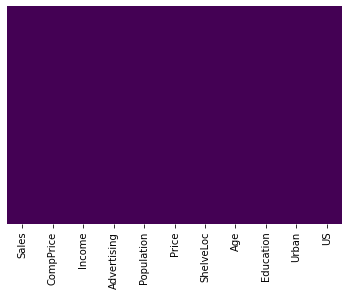

In [6]:
sns.heatmap(comp_data.isna(),cmap='viridis',cbar=False,yticklabels=False)

In [7]:
comp_data[comp_data.duplicated()].shape

(0, 11)

In [8]:
## There are no Null and Duplicate Values in our data

In [9]:
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [10]:
## Summary Statistics

In [11]:
comp_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


## Understanding target VAriable

In [12]:
comp_data['Sales'].value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

In [13]:
## We can see the target variable is continious

## Converting the categorical columns into Numerical

In [14]:
def getValue_counts(data):
    for column in data.columns:
        if data[column].dtype=='object':
            print(data[column].value_counts())
            
getValue_counts(comp_data)            

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Yes    282
No     118
Name: Urban, dtype: int64
Yes    258
No     142
Name: US, dtype: int64


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder=LabelEncoder()

In [17]:
comp_data['ShelveLoc']=label_encoder.fit_transform(comp_data['ShelveLoc'])


In [18]:
comp_data['Urban']=label_encoder.fit_transform(comp_data['Urban'])
comp_data['US']=label_encoder.fit_transform(comp_data['US'])

In [19]:
comp_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


## Data Visualization

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

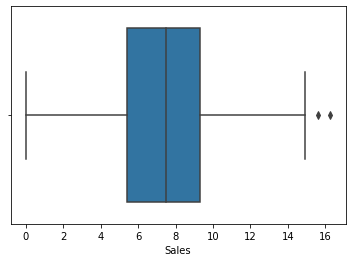

In [20]:
sns.boxplot(comp_data['Sales'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

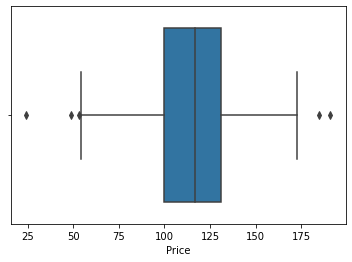

In [21]:
sns.boxplot(comp_data['Price'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

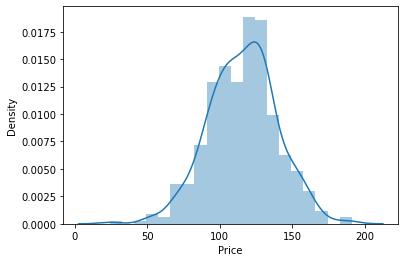

In [22]:
sns.distplot(comp_data['Price'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Advertising', ylabel='Density'>

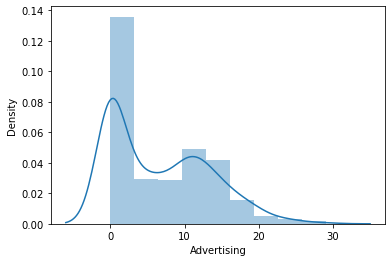

In [23]:
sns.distplot(comp_data['Advertising'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CompPrice', ylabel='Density'>

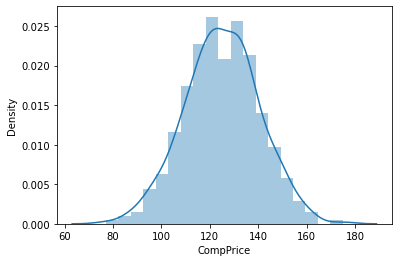

In [24]:
sns.distplot(comp_data['CompPrice'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

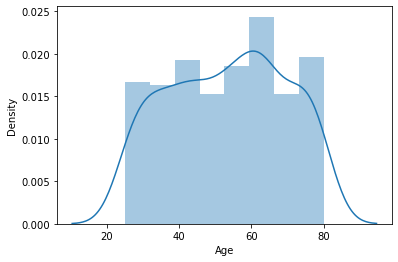

In [25]:
sns.distplot(comp_data['Age'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

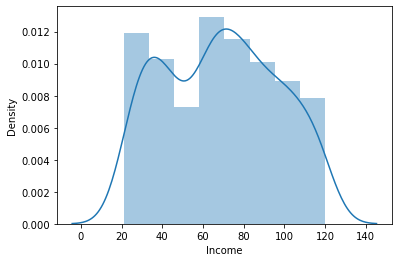

In [26]:
sns.distplot(comp_data['Income'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Advertising'>

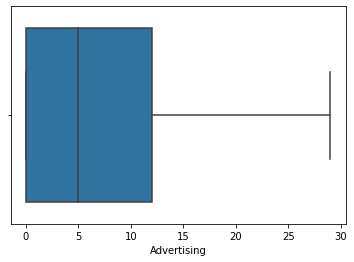

In [27]:
sns.boxplot(comp_data['Advertising'])

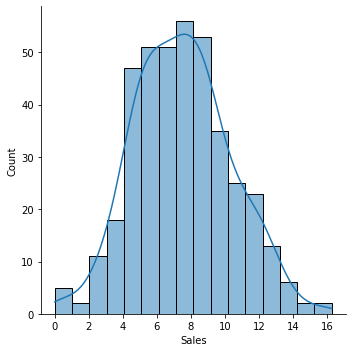

In [28]:
sns.displot(comp_data['Sales'],kde=True)

In [29]:
## We can see from the above distplot for Sales,
## the values lies from 0 to 16 (in thousands) for sales.

#### We will use cut function of pandas to split the sales into 3 groups- 
#### High, Medium , Low , since we have to convert it into Categorical variable

We will specify bins of 0,5,10 and 16 as 16 is the maximum value and 0 is the minimum value.
1.The sales values between 0 to 5 (since we are specifying right = True,the upper value will belong to same bin) will be first bin and belong to Low.

2.The sales values between 5 to 10 (since we are specifying right = True,the upper value will belong to same bin) will be second bin and belong to Medium.

3.The sales values between 10 to 16 (since we are specifying right = True,the upper value will belong to same bin) will be third bin and belong to High.

In [30]:
comp_data['Sales_cat']=pd.cut(x=comp_data['Sales'],bins=[0,5.5,11,16.5],
                              labels=['Low','Medium','High'],right=False)
comp_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,0,42,17,1,1,Medium
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,Medium
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Low


In [31]:
comp_data['Sales_cat'].value_counts()

Medium    248
Low       103
High       49
Name: Sales_cat, dtype: int64

In [32]:
## Converting into numerical

In [33]:
comp_data['Sales_cat']=label_encoder.fit_transform(comp_data['Sales_cat'])

In [34]:
comp_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,0,42,17,1,1,2
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,2
3,7.40,117,100,4,466,97,2,55,14,1,1,2
4,4.15,141,64,3,340,128,0,38,13,1,0,1


In [35]:
comp_data.drop(columns=['Sales'],axis=1,inplace=True)

In [36]:
comp_data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,2
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,1


## Implementing train -test split on our Data

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X=comp_data.iloc[:,:-1]
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [39]:
Y=comp_data['Sales_cat']
Y.head()

0    2
1    0
2    2
3    2
4    1
Name: Sales_cat, dtype: int32

In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [41]:
X_train.shape

(320, 10)

In [42]:
X_test.shape

(80, 10)

## Checking for class Imbalance Problem in Target Variable

In [43]:
comp_data['Sales_cat'].value_counts()

2    248
1    103
0     49
Name: Sales_cat, dtype: int64

<AxesSubplot:xlabel='Sales_cat', ylabel='count'>

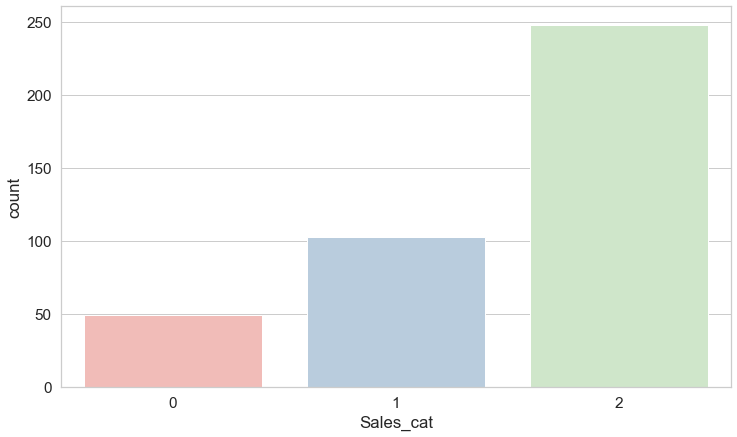

In [44]:
sns.set(style = 'whitegrid', font_scale = 1.4)
plt.subplots(figsize = (12,7))
sns.countplot(x = 'Sales_cat', data = comp_data, palette = 'Pastel1')

## Balancing Data over Sampling

#### We will be using SMOTE sampling technique for resampling and balancing the data

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
sm=SMOTE(sampling_strategy='not majority',random_state=0)

In [47]:
x_resample,y_resample=sm.fit_resample(X,Y)
y_df=pd.DataFrame(y_resample)

In [48]:
x_resample

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
739,120,67,0,278,148,1,79,12,1,0
740,111,83,9,400,110,0,70,12,1,1
741,126,54,12,496,143,1,57,13,1,0
742,110,30,2,479,105,1,38,11,0,0


In [49]:
y_df

,Sales_cat
0,2
1,0
2,2
3,2
4,1
...,...
739,1
740,1
741,1
742,1


In [50]:
x_resample.shape,y_df.shape

((744, 10), (744, 1))

In [51]:
y_df.value_counts()

Sales_cat
0            248
1            248
2            248
dtype: int64

<AxesSubplot:xlabel='Sales_cat', ylabel='count'>

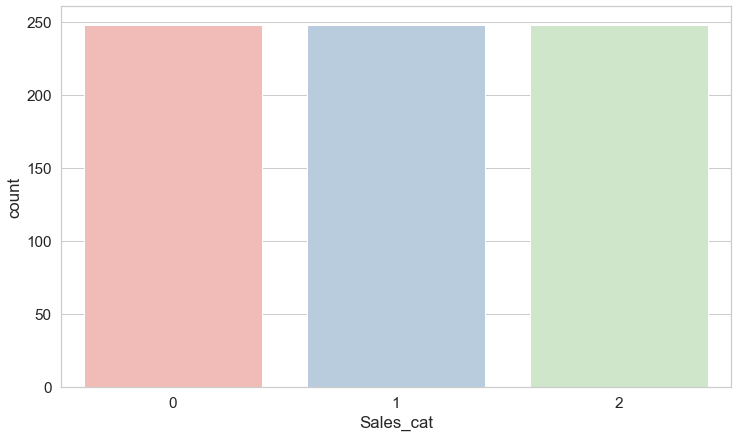

In [52]:
sns.set(style = 'whitegrid', font_scale = 1.4)
plt.subplots(figsize = (12,7))
sns.countplot(x = 'Sales_cat', data = y_df, palette = 'Pastel1')

In [53]:
## We could see the data is resampled so we can move ahead and build model

In [54]:
X_train, X_test,Y_train,Y_test = train_test_split(x_resample,y_resample, test_size=0.3,random_state=0)

In [55]:
X_train.shape

(520, 10)

In [56]:
X_test.shape

(224, 10)

## Model Building

## Using Decision Tree Classifier 

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix,f1_score
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [59]:
## Predicting on Train Data set

In [60]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [61]:
preds_train_dt=model.predict(X_train)
preds_train_dt

array([0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1, 2, 2, 0,
       1, 1, 2, 0, 0, 0, 2, 0, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 2, 0, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0,
       1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 2,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 1, 2, 1, 1, 0, 2, 0, 1, 2, 0, 0,
       2, 1, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0,
       2, 0, 2, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1,
       0, 2, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2,
       0, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1,
       2, 0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 2, 1, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2,
       0, 1, 2, 1, 1, 2, 1, 2, 0, 1, 2, 2, 0, 0, 1,

In [62]:
pd.Series(preds_train_dt).value_counts()

0    208
1    204
2    108
dtype: int64

In [63]:
pd.crosstab(Y_train,preds_train_dt)

col_0,0,1,2
Sales_cat,,,
0,158,6,8
1,7,152,15
2,43,46,85


### Predicting on Test Data

In [64]:
preds_test_dt=model.predict(X_test)
preds_test_dt

array([1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 1,
       2, 2, 1, 2, 2, 1, 0, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 1, 0,
       0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2,
       0, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2,
       2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 2, 2, 0, 1, 2,
       2, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0,
       2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0,
       0, 0, 1, 2])

In [65]:
pd.Series(preds_test_dt).value_counts()

0    88
1    81
2    55
dtype: int64

In [66]:
pd.crosstab(Y_test,preds_test_dt)

col_0,0,1,2
Sales_cat,,,
0,70,4,2
1,4,61,9
2,14,16,44


## Checking accuracy

In [67]:
from sklearn.metrics import classification_report,accuracy_score

In [68]:
accuracy=accuracy_score(Y_test,preds_test_dt)
accuracy

0.78125

In [69]:
accuracy=accuracy_score(Y_train,preds_train_dt)
accuracy

0.7596153846153846

#### If we compare the train and test accuracy, we don't have much difference so there is no overfitting problem in our model


In [70]:
print(classification_report(Y_test,preds_test_dt))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85        76
           1       0.75      0.82      0.79        74
           2       0.80      0.59      0.68        74

    accuracy                           0.78       224
   macro avg       0.78      0.78      0.77       224
weighted avg       0.78      0.78      0.78       224



## Using Random Forest Classifier

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [72]:
clf = RandomForestClassifier(random_state=0)

In [73]:
params={'n_estimators':[170,180,190],
        'class_weight':['balanced'], 
        'criterion':['entropy','gini'],
        'max_depth':[3,4]}

In [74]:
grid_search = GridSearchCV(estimator = clf,param_grid = params,cv = 10,scoring = 'f1',return_train_score=True)
grid_search.fit(X_train,Y_train)

C:\Users\samee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\samee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\samee\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\samee\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\samee\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\samee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['entropy', 'gini'], 'max_depth': [3, 4],
                         'n_estimators': [170, 180, 190]},
             return_train_score=True, scoring='f1')

In [75]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 3,
 'n_estimators': 170}

In [76]:
ran_model= RandomForestClassifier(class_weight='balanced',criterion= 'entropy',max_depth= 3, n_estimators= 170)
ran_model.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, n_estimators=170)

In [77]:
ran_model.fit(X_train,Y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, n_estimators=170)

In [78]:
preds_train_rn=ran_model.predict(X_train)
preds_train_rn

array([0, 0, 1, 1, 1, 2, 1, 0, 2, 1, 0, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 2, 0, 0, 1, 0, 2, 2, 2, 0,
       1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 1, 0, 1, 0, 2, 1, 2, 0, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 1, 0, 2, 1, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 2,
       0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 1, 0, 0,
       2, 1, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 2, 0, 0, 1, 2, 1, 0, 0, 0,
       2, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1,
       0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 1, 0, 2, 1, 0, 0, 1, 0, 0, 2, 1,
       2, 0, 2, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1,
       1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 1, 0, 2, 2,
       0, 0, 1, 1, 1, 2, 0, 2, 0, 1, 2, 2, 0, 0, 1,

In [79]:
pd.Series(preds_train_rn).value_counts()

0    207
1    190
2    123
dtype: int64

In [80]:
pd.crosstab(Y_train,preds_train_rn)

col_0,0,1,2
Sales_cat,,,
0,167,0,5
1,4,155,15
2,36,35,103


In [81]:
## On test

In [82]:
preds_test_rn=model.predict(X_test)
preds_test_rn

array([1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 1,
       2, 2, 1, 2, 2, 1, 0, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 1, 0,
       0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2,
       0, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2,
       2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 2, 2, 0, 1, 2,
       2, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0,
       2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0,
       0, 0, 1, 2])

In [83]:
pd.Series(preds_test_rn).value_counts()

0    88
1    81
2    55
dtype: int64

In [84]:
pd.crosstab(Y_test,preds_test_rn)

col_0,0,1,2
Sales_cat,,,
0,70,4,2
1,4,61,9
2,14,16,44


## Checking test and Train Accuracy

In [85]:
acuracy_rn_train=accuracy_score(Y_train,preds_train_rn)

In [86]:
acuracy_rn_train

0.8173076923076923

In [87]:
acuracy_rn_test=accuracy_score(Y_test,preds_test_rn)
acuracy_rn_test

0.78125

In [88]:
print(classification_report(Y_test,preds_test_rn))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85        76
           1       0.75      0.82      0.79        74
           2       0.80      0.59      0.68        74

    accuracy                           0.78       224
   macro avg       0.78      0.78      0.77       224
weighted avg       0.78      0.78      0.78       224



## Using XGBoost Classifier

In [89]:
from xgboost import XGBClassifier


In [90]:
clf1 = XGBClassifier(random_state=0)

params= {'gamma': [1, 2, 4,6],

        'n_estimators' : [250,300,350]}

In [91]:
grid_search = GridSearchCV(estimator = clf1,param_grid = params,cv = 10,scoring = 'f1',return_train_score=True)
grid_search.fit(X_train,Y_train)

C:\Users\samee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\samee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\samee\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\samee\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\samee\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\samee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
   

In [92]:
grid_search.best_params_

{'gamma': 1, 'n_estimators': 250}

In [93]:
xgb_model=XGBClassifier(n_estimators=250,gamma=1)
xgb_model.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=250,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [94]:
y_xgb_train=model.predict(X_train)
y_xgb_train

array([0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1, 2, 2, 0,
       1, 1, 2, 0, 0, 0, 2, 0, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 2, 0, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0,
       1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 2,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 1, 2, 1, 1, 0, 2, 0, 1, 2, 0, 0,
       2, 1, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0,
       2, 0, 2, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1,
       0, 2, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2,
       0, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1,
       2, 0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 2, 1, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2,
       0, 1, 2, 1, 1, 2, 1, 2, 0, 1, 2, 2, 0, 0, 1,

In [95]:
accuracy=accuracy_score(Y_train,y_xgb_train)
accuracy

0.7596153846153846

In [96]:
y_xgb_pred=model.predict(X_test)
y_xgb_pred

array([1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 1,
       2, 2, 1, 2, 2, 1, 0, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 1, 0,
       0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2,
       0, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2,
       2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 2, 2, 0, 1, 2,
       2, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0,
       2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0,
       0, 0, 1, 2])

In [97]:
accuracy=accuracy_score(Y_test,y_xgb_pred)
accuracy

0.78125

In [98]:
accuracy = accuracy_score(Y_test,y_xgb_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.12%


In [99]:
print(classification_report(Y_test,y_xgb_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85        76
           1       0.75      0.82      0.79        74
           2       0.80      0.59      0.68        74

    accuracy                           0.78       224
   macro avg       0.78      0.78      0.77       224
weighted avg       0.78      0.78      0.78       224



In [100]:
## Thus we have implemented the Random Forest Algorithm and over it we have done boosting using XGBoost Algorithm on Above Company data and 
## and we have got the accuracy of 0.78 i.e 78%.